In [ ]:
!git clone https://github.com/mayureshagashe2105/DSN-Project-Exibition.git

Cloning into 'DSN-Project-Exibition'...
remote: Enumerating objects: 2802, done.
remote: Total 2802 (delta 0), reused 0 (delta 0), pack-reused 2802
Receiving objects: 100% (2802/2802), 404.65 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (1355/1355), done.
Checking out files: 100% (2769/2769), done.


# 1. CSV DATA

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
data = pd.read_csv('/content/DSN-Project-Exibition/Datasets/CSV Data/cardio_train.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data['gender'] = data['gender'].replace(1, 0)
data['gender'] = data['gender'].replace(2, 1)

In [ ]:
data['cholesterol'] = data['cholesterol'].replace(1, 0)
data['cholesterol'] = data['cholesterol'].replace(2, 1)
data['cholesterol'] = data['cholesterol'].replace(3, 2)

In [ ]:
data['age'] = round(data['age'] / 365.0)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,1,168,62.0,110,80,0,1,0,0,1,0
1,1,55.0,0,156,85.0,140,90,2,1,0,0,1,1
2,2,52.0,0,165,64.0,130,70,2,1,0,0,0,1
3,3,48.0,1,169,82.0,150,100,0,1,0,0,1,1
4,4,48.0,0,156,56.0,100,60,0,1,0,0,0,0


In [ ]:
data['height'] = data['height'] / 100.0
BMI = np.array(data['weight'] / np.square(data['height']))

In [ ]:
BMI

array([21.96712018, 34.92767916, 23.50780533, ..., 31.35357879,
       27.09925101, 24.91349481])

In [ ]:
for i in range(len(BMI)):
  if BMI[i] < 18.5:
    BMI[i] = 0
  elif BMI[i] >= 18.5 and BMI[i] < 24.9:
    BMI[i] = 1
  elif BMI[i] >= 24.9 and BMI[i] <29.9:
    BMI[i] = 2
  else:
    BMI[i] = 3

In [ ]:
BMI = BMI.astype('int32')

In [ ]:
data['bmi'] = BMI

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.0,1,1.68,62.0,110,80,0,1,0,0,1,0,1
1,1,55.0,0,1.56,85.0,140,90,2,1,0,0,1,1,3
2,2,52.0,0,1.65,64.0,130,70,2,1,0,0,0,1,1
3,3,48.0,1,1.69,82.0,150,100,0,1,0,0,1,1,2
4,4,48.0,0,1.56,56.0,100,60,0,1,0,0,0,0,1


In [ ]:
data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['ap_hi'] = (data['ap_hi'] - data['ap_hi'].mean()) / data['ap_hi'].std()
data['ap_lo'] = (data['ap_lo'] - data['ap_lo'].mean()) / data['ap_lo'].std()

In [ ]:
data1 = data.drop(['id', 'weight', 'height'], axis=1)
data1.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.493502,1,-0.122181,-0.088238,0,1,0,0,1,0,1
1,0.245564,0,0.072610,-0.035180,2,1,0,0,1,1,3
2,-0.197875,0,0.007679,-0.141296,2,1,0,0,0,1,1
3,-0.789128,1,0.137540,0.017878,0,1,0,0,1,1,2
4,-0.789128,0,-0.187111,-0.194354,0,1,0,0,0,0,1


In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,-0.493502,1,1.68,62.0,-0.122181,-0.088238,0,1,0,0,1,0,1
1,1,0.245564,0,1.56,85.0,0.072610,-0.035180,2,1,0,0,1,1,3
2,2,-0.197875,0,1.65,64.0,0.007679,-0.141296,2,1,0,0,0,1,1
3,3,-0.789128,1,1.69,82.0,0.137540,0.017878,0,1,0,0,1,1,2
4,4,-0.789128,0,1.56,56.0,-0.187111,-0.194354,0,1,0,0,0,0,1


In [ ]:
X = np.array(data.drop(['id', 'cardio', 'weight', 'height'], axis=1))
y = np.array(data['cardio'], dtype='int32')

In [ ]:
X = X[:-1]
y = y[:-1]

In [ ]:
def train_test_split(X, y, test_split_size=0.2):
  rand_row_num = np.random.randint(0, len(y), int(len(y) * test_split_size))

  X_test = np.array([X[i] for i in rand_row_num])
  X_train = np.delete(X, rand_row_num, axis=0)

  y_test = np.array([y[i] for i in rand_row_num])
  y_train = np.delete(y, rand_row_num, axis=0)

  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [ ]:
def build_model():
  inputs = layers.Input((10, ))
  x = layers.Dense(1024, activation='relu')(inputs)
  # x = layers.Dense(128, activation='relu')(x)
  # x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.1)(x)

  outputs = layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              11264     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 1025      
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='auc', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
448/448 [==============================] - 8s 13ms/step - loss: 0.6356 - tp: 19317.0000 - fp: 11138.0000 - tn: 17476.0000 - fn: 9312.0000 - accuracy: 0.6428 - precision: 0.6343 - recall: 0.6747 - auc: 0.6995 - prc: 0.6870 - val_loss: 0.6114 - val_tp: 4617.0000 - val_fp: 2321.0000 - val_tn: 4724.0000 - val_fn: 2337.0000 - val_accuracy: 0.6673 - val_precision: 0.6655 - val_recall: 0.6639 - val_auc: 0.7303 - val_prc: 0.7109
Epoch 2/30
448/448 [==============================] - 5s 12ms/step - loss: 0.6053 - tp: 19060.0000 - fp: 8900.0000 - tn: 19714.0000 - fn: 9569.0000 - accuracy: 0.6774 - precision: 0.6817 - recall: 0.6658 - auc: 0.7400 - prc: 0.7225 - val_loss: 0.5938 - val_tp: 4762.0000 - val_fp: 2190.0000 - val_tn: 4855.0000 - val_fn: 2192.0000 - val_accuracy: 0.6870 - val_precision: 0.6850 - val_recall: 0.6848 - val_auc: 0.7550 - val_prc: 0.7327
Epoch 3/30
448/448 [==============================] - 5s 11ms/step - loss: 0.5899 - tp: 19428.0000 - fp: 8049.0000 - tn: 20565.00

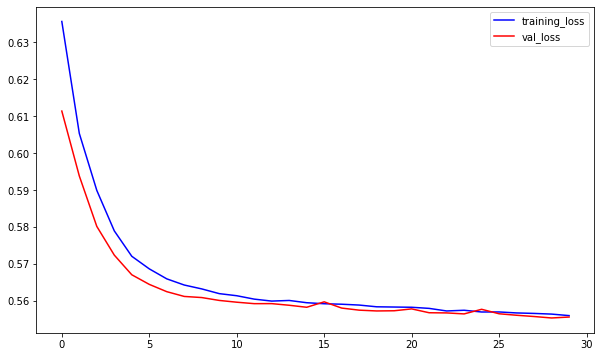

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history.history['accuracy'])), history.history['loss'], color='b', label='training_loss')
plt.plot(np.arange(len(history.history['accuracy'])), history.history['val_loss'], color='r', label='val_loss')
plt.legend()
plt.show()

In [ ]:
s = history.history['tp'][-1] + history.history['fp'][-1] + history.history['tn'][-1] + history.history['fn'][-1]

In [ ]:
(history.history['tp'][-1] + history.history['tn'][-1]) / s

0.7300980032493056

In [ ]:
history.history['fn'][-1] / s

0.1459916496340164

In [ ]:
history.history['fp'][-1] / s

0.12391034711667802

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

219/219 [==============================] - 2s 8ms/step - loss: 0.5556 - tp: 4813.0000 - fp: 1606.0000 - tn: 5439.0000 - fn: 2141.0000 - accuracy: 0.7323 - precision: 0.7498 - recall: 0.6921 - auc: 0.7958 - prc: 0.7713


[0.5555928945541382,
 4813.0,
 1606.0,
 5439.0,
 2141.0,
 0.732338011264801,
 0.7498052716255188,
 0.6921196579933167,
 0.795809268951416,
 0.7712564468383789]

# 2. ECG IMAGES

In [ ]:
!git clone https://github.com/mayureshagashe2105/DSN-Project-Exibition.git

fatal: destination path 'DSN-Project-Exibition' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import glob
from tqdm.notebook import tqdm
import os

In [ ]:
MI_patients =  glob.glob('/content/DSN-Project-Exibition/Datasets/ECG images/ECG Images of Myocardial Infarction Patients (77)/*')
MI_history_patients = glob.glob('/content/DSN-Project-Exibition/Datasets/ECG images/ECG Images of Patient that have History of MI (203)/*')
abnormal_ECG_patients = glob.glob('/content/DSN-Project-Exibition/Datasets/ECG images/ECG Images of Patient that have abnormal heart beats (548)/*')
normal_ECG_patients = glob.glob('/content/DSN-Project-Exibition/Datasets/ECG images/Normal Person ECG Images (859)/*')

(1572, 2213, 3)


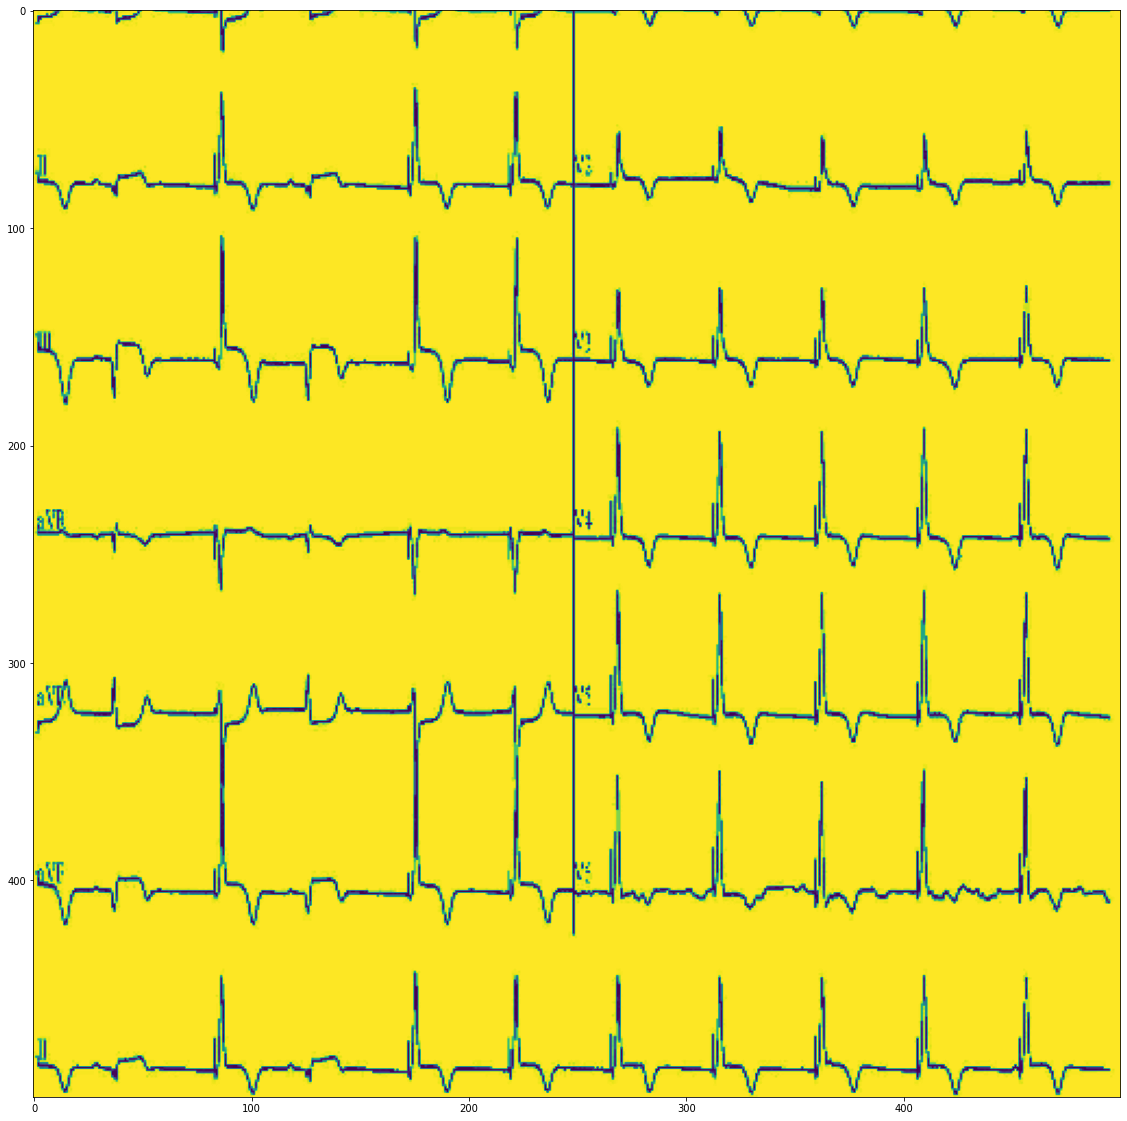

In [ ]:
print(tf.image.decode_jpeg(tf.io.read_file(MI_patients[0])).shape)
plt.figure(figsize=(20, 20))
img = tf.image.resize(tf.image.decode_and_crop_jpeg(tf.io.read_file(MI_patients[0]), [400, 145, 1060, 1995], channels=1), (500, 500))
plt.imshow(tf.reshape(img, (500, 500)))

In [ ]:
MI_patients_list = []
for image in tqdm(MI_patients):
  MI_patients_list.append(tf.image.resize(tf.image.decode_and_crop_jpeg(tf.io.read_file(image), [400, 145, 1060, 1995], channels=1), (500, 500)))
MI_patients_list = tf.stack(MI_patients_list, 0)

MI_history_patients_list = []
for image in tqdm(MI_history_patients):
  MI_history_patients_list.append(tf.image.resize(tf.image.decode_and_crop_jpeg(tf.io.read_file(image), [400, 145, 1060, 1995], channels=1), (500, 500)))
MI_history_patients_list = tf.stack(MI_history_patients_list, 0)

abnormal_ECG_patients_list = []
for image in tqdm(abnormal_ECG_patients):
  abnormal_ECG_patients_list.append(tf.image.resize(tf.image.decode_and_crop_jpeg(tf.io.read_file(image), [400, 145, 1060, 1995], channels=1), (500, 500)))
abnormal_ECG_patients_list = tf.stack(abnormal_ECG_patients_list, 0)


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/203 [00:00<?, ?it/s]

  0%|          | 0/546 [00:00<?, ?it/s]

In [ ]:
class_1_images = tf.concat([MI_patients_list, MI_history_patients_list, abnormal_ECG_patients_list], axis=0)
class_1_images.shape

TensorShape([823, 500, 500, 1])

In [ ]:
normal_ECG_people_list = []
for image in tqdm(normal_ECG_patients):
  normal_ECG_people_list.append(tf.image.resize(tf.image.decode_and_crop_jpeg(tf.io.read_file(image), [400, 145, 1060, 1995], channels=1), (500, 500)))
normal_ECG_people_list = tf.stack(normal_ECG_people_list, 0)

  0%|          | 0/859 [00:00<?, ?it/s]

In [ ]:
class_0_images = normal_ECG_people_list
class_0_images.shape

TensorShape([859, 500, 500, 1])

In [ ]:
X = tf.concat([class_0_images, class_1_images], axis=0)
X.shape

TensorShape([1682, 500, 500, 1])

In [ ]:
labels = np.zeros((859+823,), dtype='int32')
labels[:859] = 0
labels[859:] = 1
labels = tf.Variable(labels, dtype='int32')

In [ ]:
def input_pipeline(X, y, batch_size, shuffle_buffer, val_split=0.2):
  split_index = int(len(X) * (1 - val_split))
  ds = tf.data.Dataset.from_tensor_slices((X / 255.0, y))
  ds = ds.shuffle(shuffle_buffer)
  train_ds = ds.take(split_index)
  val_ds = ds.skip(split_index)
  return (train_ds.batch(batch_size).prefetch(1), val_ds.batch(batch_size).prefetch(1))
  

train_ds, val_ds = input_pipeline(X, labels, 32, 1682)
train_ds, val_ds

(<PrefetchDataset shapes: ((None, 500, 500, 1), (None,)), types: (tf.float32, tf.int32)>,
 <PrefetchDataset shapes: ((None, 500, 500, 1), (None,)), types: (tf.float32, tf.int32)>)

In [ ]:
def build_model():
  inputs = layers.Input((500, 500, 1))
  x = layers.Conv2D(32, (5, 5) , activation='relu')(inputs)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(32, (3, 3) , activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(32, (3, 3) , activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs], name='ECG_Classifier')
  return model

model = build_model()
model.summary()

Model: "ECG_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)   

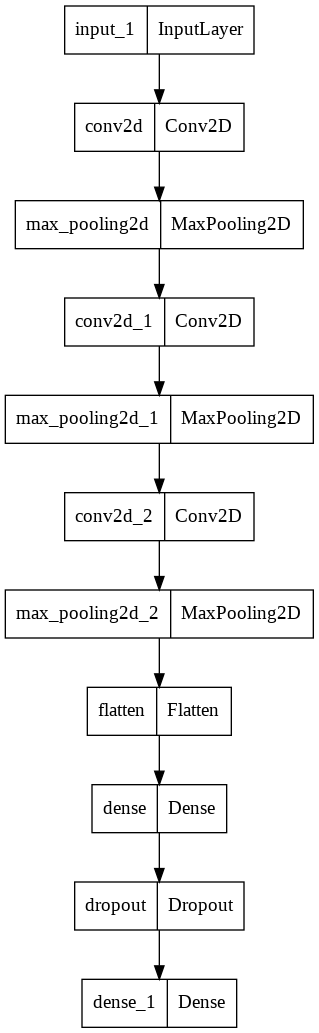

In [ ]:
tf.keras.utils.plot_model(model, 'ECG_Classifier.png')

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='recall', 
    verbose=1,
    patience=3,
    mode='max',
    restore_best_weights=True)

In [ ]:
histroy = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/20
43/43 [==============================] - 24s 277ms/step - loss: 0.8556 - tp: 379.0000 - fp: 261.0000 - tn: 419.0000 - fn: 286.0000 - accuracy: 0.5933 - precision: 0.5922 - recall: 0.5699 - auc: 0.6292 - prc: 0.6225 - val_loss: 0.7057 - val_tp: 46.0000 - val_fp: 0.0000e+00 - val_tn: 177.0000 - val_fn: 114.0000 - val_accuracy: 0.6617 - val_precision: 1.0000 - val_recall: 0.2875 - val_auc: 0.8248 - val_prc: 0.8489
Epoch 2/20
43/43 [==============================] - 9s 215ms/step - loss: 0.5460 - tp: 361.0000 - fp: 90.0000 - tn: 592.0000 - fn: 302.0000 - accuracy: 0.7086 - precision: 0.8004 - recall: 0.5445 - auc: 0.7503 - prc: 0.8034 - val_loss: 0.4767 - val_tp: 129.0000 - val_fp: 42.0000 - val_tn: 133.0000 - val_fn: 33.0000 - val_accuracy: 0.7774 - val_precision: 0.7544 - val_recall: 0.7963 - val_auc: 0.8825 - val_prc: 0.8963
Epoch 3/20
43/43 [==============================] - 9s 216ms/step - loss: 0.4670 - tp: 419.0000 - fp: 77.0000 - tn: 618.0000 - fn: 231.0000 - accuracy: 0

In [ ]:
ECG_model = model
ECG_X = X
ECG_y = labels

In [ ]:
model.evaluate(val_ds)

11/11 [==============================] - 3s 72ms/step - loss: 0.0059 - tp: 169.0000 - fp: 0.0000e+00 - tn: 168.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000


[0.0058768270537257195, 169.0, 0.0, 168.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
model.save('ECG_Classifier1.h5')

In [ ]:
history = histroy

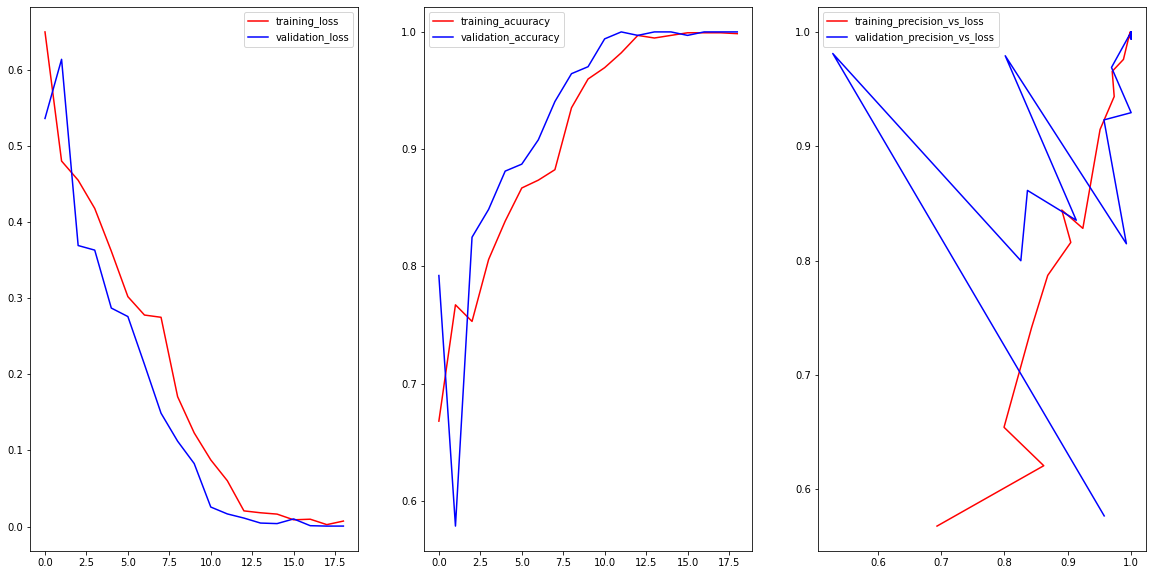

In [ ]:
epochs = np.arange(len(history.history['loss']))
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].plot(epochs, histroy.history['loss'], color='r', label='training_loss')
axes[0].plot(epochs, histroy.history['val_loss'], color='b', label='validation_loss')
axes[0].legend()

axes[1].plot(epochs, histroy.history['accuracy'], color='r', label='training_acuuracy')
axes[1].plot(epochs, histroy.history['val_accuracy'], color='b', label='validation_accuracy')
axes[1].legend()

axes[2].plot(histroy.history['precision'], histroy.history['recall'], color='r', label='training_precision_vs_loss')
axes[2].plot(histroy.history['val_precision'], histroy.history['val_recall'], color='b', label='validation_precision_vs_loss')
axes[2].legend()

plt.show()



In [ ]:
def visualize_interm_convs(input_image, model):
  successive_outputs = [layer.output for layer in model.layers[1:]]
  visualization_model = tf.keras.Model(inputs=model.input, outputs=successive_outputs, name='visualization_model')

  if len(input_image.shape) != 4:
    input_image = tf.expand_dims(input_image, 0)
  
  img = input_image / 255.0

  predictions = visualization_model.predict(img)

  layer_names = [layer.name for layer in model.layers[1:]]

  for layer_name, feature_map in zip(layer_names, predictions):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]

      disp_grid = np.zeros((size, size * n_features))

      for i in range(n_features):
        disp_grid[:, i * size:(i + 1) * size] = feature_map[0, :, :, i]


      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale * 2) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow( disp_grid, aspect='auto', cmap='viridis' )




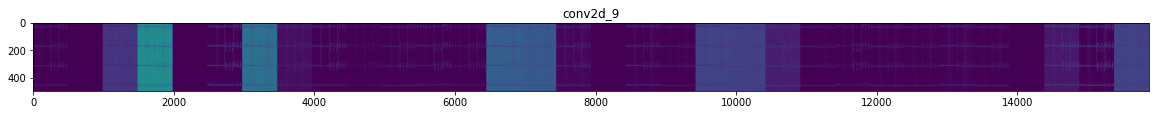

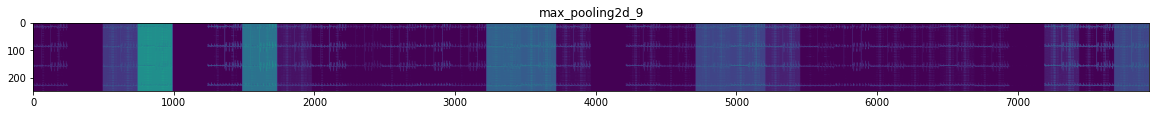

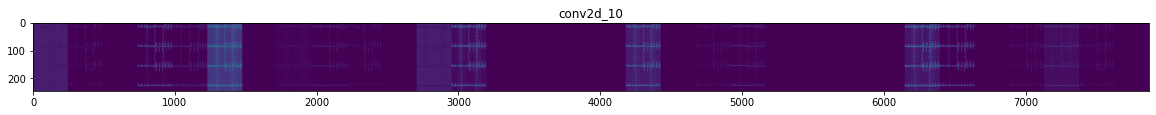

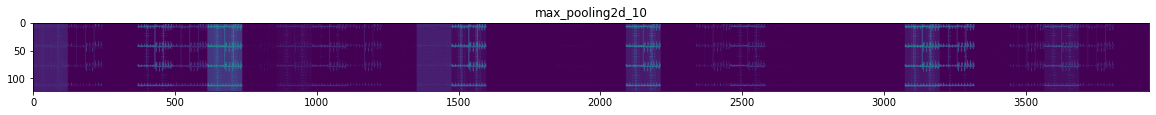

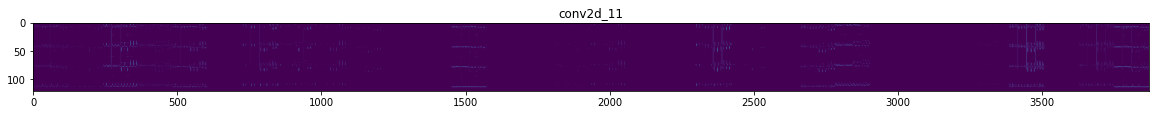

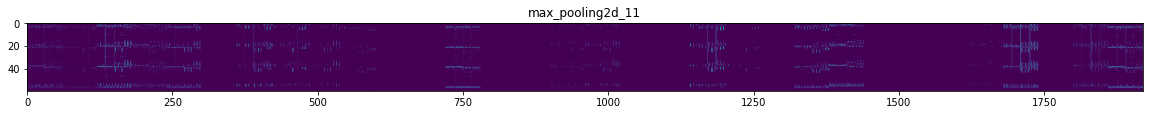

In [ ]:
visualize_interm_convs(X[0], model)

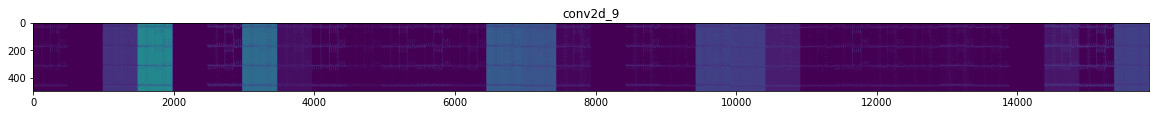

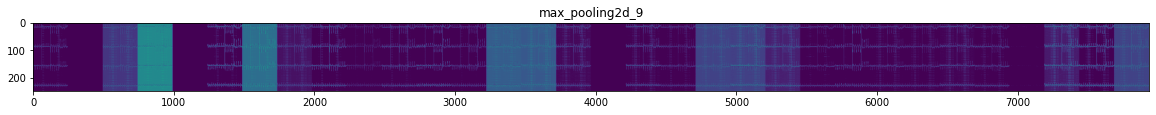

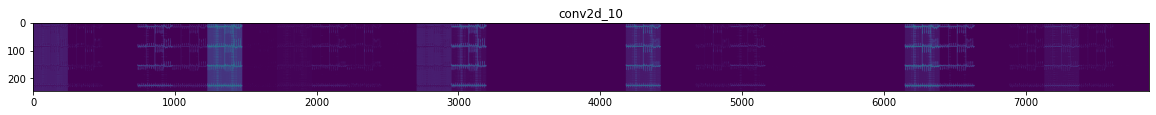

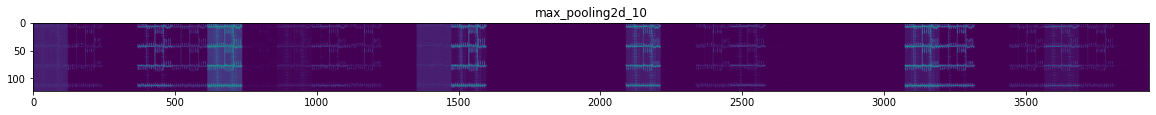

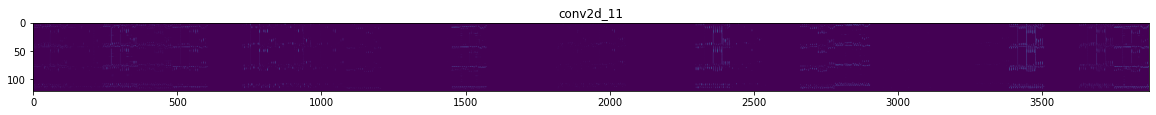

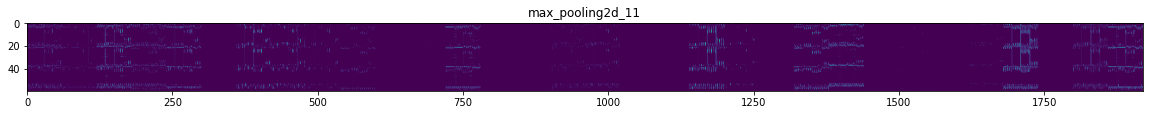

In [ ]:
visualize_interm_convs(X[-1], model)

In [ ]:
11image = plt.imread('/content/DSN-Project-Exibition/Datasets/ECG images/Normal Person ECG Images (859)/Normal (1).jpg')

In [ ]:
image = image.astype('float32')

In [ ]:
image.shape

(1572, 2213, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


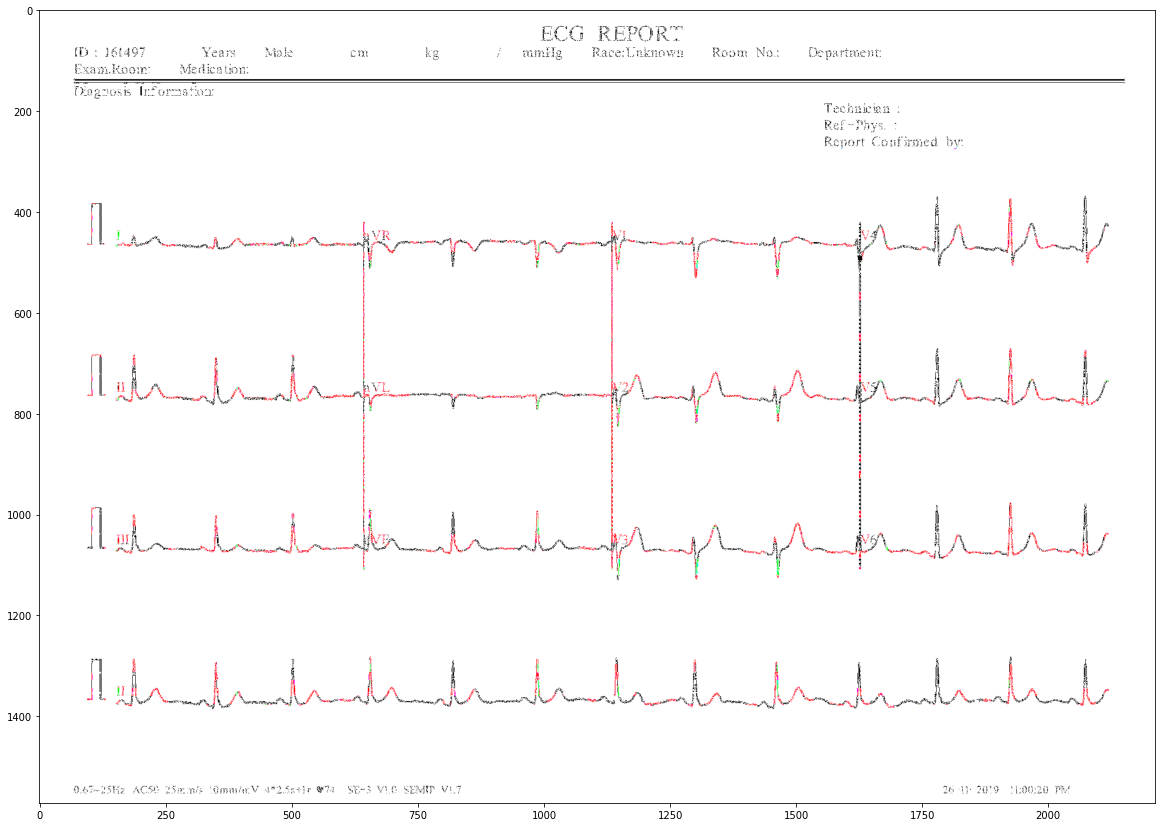

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(image)

In [ ]:
img = tf.image.crop_to_bounding_box(tf.expand_dims(image, 0), 300, 0, image.shape[0] - 400, 2213)
img.shape

TensorShape([1, 1172, 2213, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


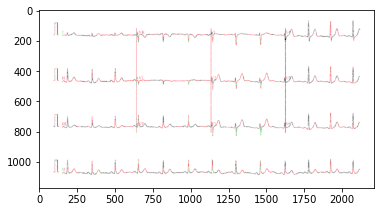

In [ ]:
plt.imshow(tf.reshape(img, (-1, 2213, 3)))

In [ ]:
y = layers.Cropping2D(((350, 150), (0, 0)))(tf.expand_dims(image, 0))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


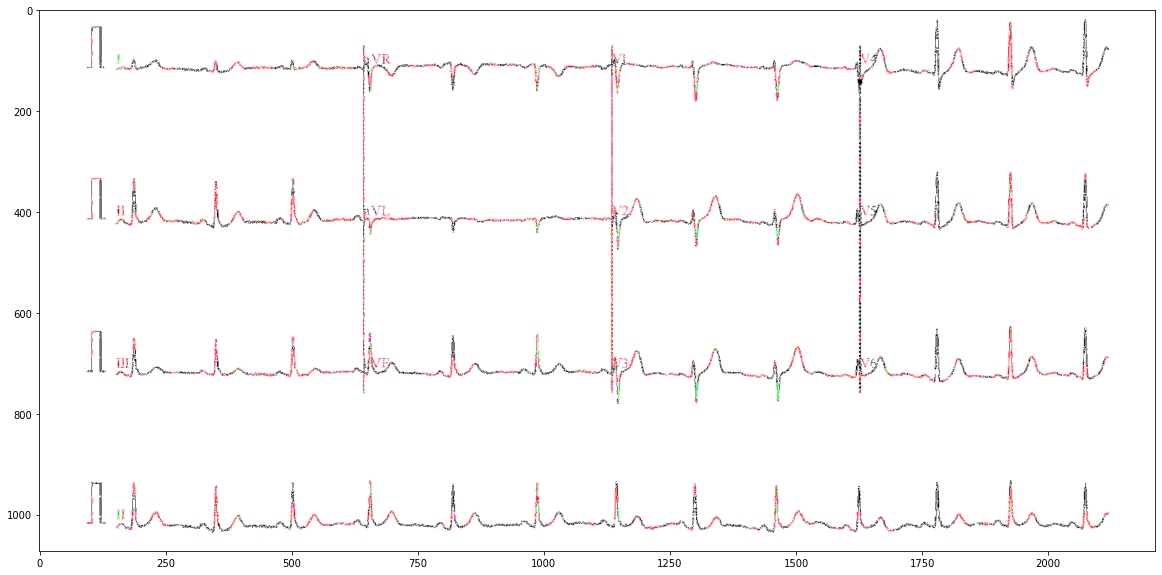

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(tf.reshape(y, (-1, image.shape[1], 3)))

# 3. SOUND DATA

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import os
from scipy.io import wavfile

In [ ]:
data = pd.read_csv('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds/set_b.csv')

In [ ]:
data.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [ ]:
data['label'].value_counts()

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

In [ ]:
data['label'].replace('normal', 0, inplace=True)
data['label'].replace('murmur', 1, inplace=True)
data['label'].replace('extrastole', 2, inplace=True)

In [ ]:
data.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,2.0,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,2.0,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,2.0,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,2.0,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,2.0,NaN


In [ ]:
ds = data.drop(['dataset', 'sublabel'], axis=1)
ds = ds.set_index('fname')
ds.head()

,label
fname,
set_b/Btraining_extrastole_127_1306764300147_C2.wav,2.0
set_b/Btraining_extrastole_128_1306344005749_A.wav,2.0
set_b/Btraining_extrastole_130_1306347376079_D.wav,2.0
set_b/Btraining_extrastole_134_1306428161797_C1.wav,2.0
set_b/Btraining_extrastole_138_1306762146980_B.wav,2.0


In [ ]:
ds.index

Index(['set_b/Btraining_extrastole_127_1306764300147_C2.wav',
       'set_b/Btraining_extrastole_128_1306344005749_A.wav',
       'set_b/Btraining_extrastole_130_1306347376079_D.wav',
       'set_b/Btraining_extrastole_134_1306428161797_C1.wav',
       'set_b/Btraining_extrastole_138_1306762146980_B.wav',
       'set_b/Btraining_extrastole_140_1306519735121_D.wav',
       'set_b/Btraining_extrastole_144_1306522408528_B.wav',
       'set_b/Btraining_extrastole_144_1306522408528_B1.wav',
       'set_b/Btraining_extrastole_148_1306768801551_B.wav',
       'set_b/Btraining_extrastole_151_1306779785624_B.wav',
       ...
       'set_b/Btraining_normal_Btraining_noisynormal_270_1309369533040_B.wav',
       'set_b/Btraining_normal_Btraining_noisynormal_271_1309369876160_A.wav',
       'set_b/Btraining_normal_Btraining_noisynormal_271_1309369876160_C.wav',
       'set_b/Btraining_normal_Btraining_noisynormal_271_1309369876160_D.wav',
       'set_b/Btraining_normal_Btraining_noisynormal_278_131

In [ ]:
def data_prep(ds):
  X, y, X_test = [], [], []
  for file in os.listdir('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds/set_b'):
    if 'extrastole' in file:
      y.append(2)
    elif 'murmur' in file:
      y.append(1)
    elif 'normal' in file:
      y.append(0)
    else:
      samplerate, data1 = wavfile.read(os.path.join('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds/set_b', file))
      X_test.append(data1[:3053])
      continue

    samplerate, data = wavfile.read(os.path.join('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds/set_b', file))
    temp = list(data)
    X.append(list(data))
  
  max_seq_len = 4000
  for i in range(len(X)):
    if len(X[i]) <= max_seq_len:
      for _ in range(max_seq_len - len(X[i])):
        X[i].append(0)
    else:
      X[i] = X[i][:max_seq_len]
  

  
  X = np.array(X) / np.max(X)
  print(X.shape)
  y = np.array(y)
  X_test = np.array(X_test) / np.max(X_test)
  return X, y, X_test


X, y, X_test = data_prep(ds)

(461, 4000)


In [ ]:
np.max(X)

1.0

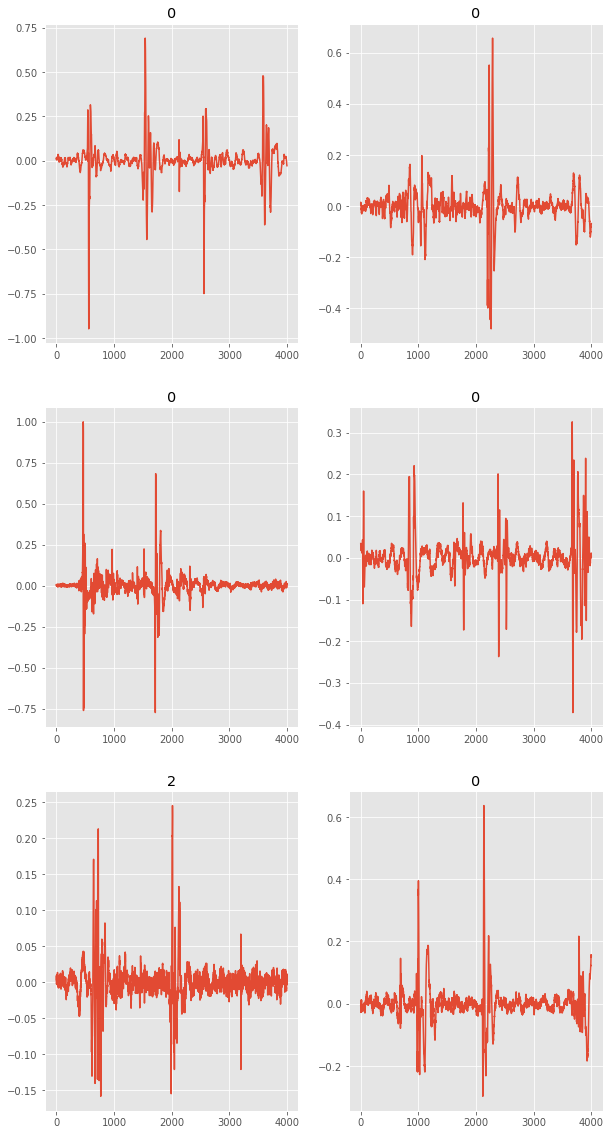

In [ ]:
style.use('ggplot')
fig, axes = plt.subplots(3, 2, figsize=(10, 20))
rand_sample = np.random.randint(0, len(X), 6)
counter = 0
for i in range(3):
  for j in range(2):
    axes[i][j].plot(np.arange(len(X[rand_sample[counter]])), X[rand_sample[counter]])
    axes[i][j].set_title(f'{y[rand_sample[counter]]}')
    counter += 1

In [ ]:
np.unique(y, return_counts=True)[1][0]

320

In [ ]:
y.shape[0]

461

<BarContainer object of 3 artists>

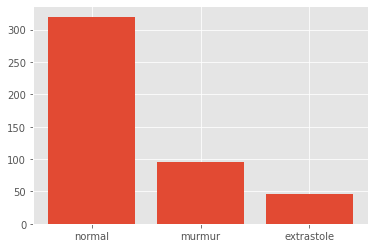

In [ ]:
plt.bar(['normal', 'murmur', 'extrastole'], 
        [np.unique(y, return_counts=True)[1][0], np.unique(y, return_counts=True)[1][1], np.unique(y, return_counts=True)[1][2]])

In [ ]:
weight_for_0 = (1 / np.unique(y, return_counts=True)[1][0]) * (len(y) / 3.0)
weight_for_1 = (1 / np.unique(y, return_counts=True)[1][1]) * (len(y) / 3.0)
weight_for_2 = (1 / np.unique(y, return_counts=True)[1][2]) * (len(y) / 3.0)

class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
class_weights

{0: 0.48020833333333335, 1: 1.6175438596491227, 2: 3.3405797101449273}

In [ ]:
def train_test_split(X, y, test_split_size=0.2):
  rand_row_num = np.random.randint(0, len(y), int(len(y) * test_split_size))

  X_val = np.array([X[i] for i in rand_row_num])
  X_train = np.delete(X, rand_row_num, axis=0)

  y_val = np.array([y[i] for i in rand_row_num])
  y_train = np.delete(y, rand_row_num, axis=0)

  return X_train, y_train, X_val, y_val

X_train, y_train, X_val, y_val = train_test_split(X, y)

In [ ]:
X_train.shape

(374, 4000)

In [ ]:
def input_pipeline(X, y, shuffle_buffer, batch_size):
  X = tf.expand_dims(X, -1)
  y = ku.to_categorical(y, num_classes=3)
  ds = tf.data.Dataset.from_tensor_slices((X, y))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.batch(batch_size)
  return ds.prefetch(1)

ds_train = input_pipeline(X_train, y_train, 1000, 8)
ds_val = input_pipeline(X_val, y_val, 1000, 8)

In [ ]:
ds_train

<PrefetchDataset shapes: ((None, 4000, 1), (None, 3)), types: (tf.float64, tf.float32)>

In [ ]:
def build_model():
  inputs = layers.Input((None, 1))
  x = layers.Conv1D(64, 5, activation='relu')(inputs)
  # x = layers.Conv1D(64, 3, activation='relu')(x)
  x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
  x = layers.LSTM(32)(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(128, activation='relu')(x)
  outputs = layers.Dense(3, activation='softmax')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 129, 1)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 127, 128)      1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 63, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 112896)            0         
                                                                 
 dropout_3 (Dropout)         (None, 112896)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               14450816  
                                                           

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=METRICS)

In [ ]:
history = model.fit(ds_train, epochs=7, validation_data=ds_val)

Epoch 1/7
47/47 [==============================] - 108s 2s/step - loss: 0.8995 - tp: 237.0000 - fp: 108.0000 - tn: 640.0000 - fn: 137.0000 - accuracy: 0.7816 - precision: 0.6870 - recall: 0.6337 - auc: 0.7747 - prc: 0.5969 - val_loss: 0.7859 - val_tp: 65.0000 - val_fp: 27.0000 - val_tn: 157.0000 - val_fn: 27.0000 - val_accuracy: 0.8043 - val_precision: 0.7065 - val_recall: 0.7065 - val_auc: 0.8181 - val_prc: 0.6738
Epoch 2/7
47/47 [==============================] - 84s 2s/step - loss: 0.8417 - tp: 258.0000 - fp: 116.0000 - tn: 632.0000 - fn: 116.0000 - accuracy: 0.7932 - precision: 0.6898 - recall: 0.6898 - auc: 0.7851 - prc: 0.6210 - val_loss: 0.8130 - val_tp: 65.0000 - val_fp: 27.0000 - val_tn: 157.0000 - val_fn: 27.0000 - val_accuracy: 0.8043 - val_precision: 0.7065 - val_recall: 0.7065 - val_auc: 0.7446 - val_prc: 0.6161
Epoch 3/7
47/47 [==============================] - 86s 2s/step - loss: 0.8518 - tp: 258.0000 - fp: 116.0000 - tn: 632.0000 - fn: 116.0000 - accuracy: 0.7932 - prec

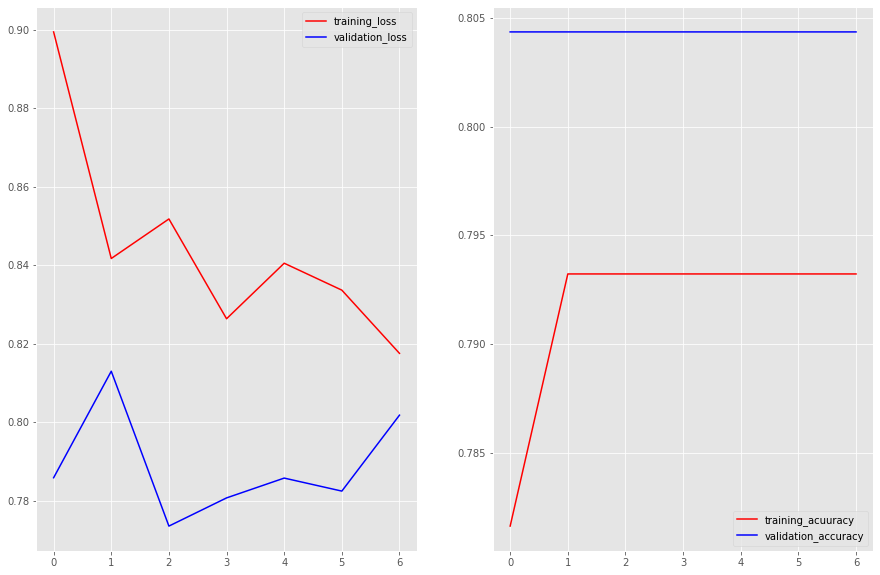

In [ ]:
epochs = np.arange(len(history.history['loss']))
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].plot(epochs, history.history['loss'], color='r', label='training_loss')
axes[0].plot(epochs, history.history['val_loss'], color='b', label='validation_loss')
axes[0].legend()

axes[1].plot(epochs, history.history['accuracy'], color='r', label='training_acuuracy')
axes[1].plot(epochs, history.history['val_accuracy'], color='b', label='validation_accuracy')
axes[1].legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import os
from scipy.io import wavfile
import pathlib

In [ ]:
data_dir = pathlib.Path('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds')

In [ ]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)

In [ ]:
test_files = tf.constant([i for i in list(filenames.numpy()) if b'Bunlabelledtest' in i])
files = tf.constant([i for i in list(filenames.numpy()) if b'Bunlabelledtest' not in i])
train_files = files[:-92]
val_files = files[-92:]

In [ ]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary)
  return tf.squeeze(audio, axis=-1)

In [ ]:
def get_label(file_path):
  print(type(file_path))
  if 'extrastole' in file_path:
      label = 2
  elif 'murmur' in file_path:
      label = 1
  elif 'normal' in file_path:
      label = 0
  
  return label  

In [ ]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [ ]:
get_waveform_and_label('/content/DSN-Project-Exibition/Datasets/Heart Beat Sounds/set_b/murmur__162_1307101835989_A.wav')

<class 'str'>


(<tf.Tensor: shape=(55227,), dtype=float32, numpy=
 array([ 1.8768311e-02, -1.6571045e-02, -3.4942627e-02, ...,
        -1.0681152e-02, -1.0406494e-02, -3.0517578e-05], dtype=float32)>, 1)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

<class 'tensorflow.python.framework.ops.Tensor'>


TypeError: ignored

# 4. Sound

In [ ]:
import zipfile
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from matplotlib import style
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_normal.zip

--2022-01-14 08:35:05--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_normal.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13761027 (13M) [application/zip]
Saving to: ‘Btraining_normal.zip’

Btraining_normal.zi 100%[===================>]  13.12M  1.25MB/s    in 15s     

2022-01-14 08:35:20 (922 KB/s) - ‘Btraining_normal.zip’ saved [13761027/13761027]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_murmur.zip

--2022-01-14 08:35:20--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_murmur.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5347795 (5.1M) [application/zip]
Saving to: ‘Btraining_murmur.zip’

Btraining_murmur.zi 100%[===================>]   5.10M   884KB/s    in 6.3s    

2022-01-14 08:35:26 (827 KB/s) - ‘Btraining_murmur.zip’ saved [5347795/5347795]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_extrasystole.zip

--2022-01-14 08:35:27--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_extrasystole.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1892466 (1.8M) [application/zip]
Saving to: ‘Btraining_extrasystole.zip’

Btraining_extrasyst 100%[===================>]   1.80M  1.01MB/s    in 1.8s    

2022-01-14 08:35:29 (1.01 MB/s) - ‘Btraining_extrasystole.zip’ saved [1892466/1892466]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Bunlabelledtest.zip

--2022-01-14 08:35:29--  http://www.peterjbentley.com/heartchallenge/wav/Bunlabelledtest.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9181589 (8.8M) [application/zip]
Saving to: ‘Bunlabelledtest.zip’

Bunlabelledtest.zip 100%[===================>]   8.76M  1.08MB/s    in 8.7s    

2022-01-14 08:35:38 (1.00 MB/s) - ‘Bunlabelledtest.zip’ saved [9181589/9181589]



In [ ]:
if not os.path.exists('/content/SoundData'):

  _root_dir = '/content/SoundData'
  !mkdir {_root_dir}

  _train_dir = os.path.join(_root_dir, 'train')
  _test_dir = os.path.join(_root_dir, 'test')
  !mkdir {_train_dir}
  !mkdir {_test_dir}

  with zipfile.ZipFile('/content/Btraining_extrasystole.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)
  
  with zipfile.ZipFile('/content/Btraining_murmur.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)
  
  with zipfile.ZipFile('/content/Btraining_normal.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)

  with zipfile.ZipFile('/content/Bunlabelledtest.zip', 'r') as zip_ref:
    zip_ref.extractall(_test_dir)

  print('Files created successfully')
  
else:
  print('Files already exists!')



Files created successfully


In [ ]:
extrasystole_list = glob.glob('/content/SoundData/train/Btraining_extrastole/*')

murmur_list = glob.glob('/content/SoundData/train/Btraining_murmur/*')
murmur_list.remove('/content/SoundData/train/Btraining_murmur/Btraining_noisymurmur')
noisy_murmur_list = glob.glob('/content/SoundData/train/Btraining_murmur/Btraining_noisymurmur/*')
murmur_list += noisy_murmur_list

normal_list = glob.glob('/content/SoundData/train/Training B Normal/*')
normal_list.remove('/content/SoundData/train/Training B Normal/Btraining_noisynormal')
noisy_normal_list = glob.glob('/content/SoundData/train/Training B Normal/Btraining_noisynormal/*')
normal_list += noisy_murmur_list


In [ ]:
extrasystole_samples = []
for i in tqdm(extrasystole_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  extrasystole_samples.append(audio)

max_len = 4000#max([len(i) for i in extrasystole_samples])
extrasystole_samples = tf.convert_to_tensor(pad_sequences(extrasystole_samples, maxlen=max_len, padding='pre', dtype='float32'))

  0%|          | 0/46 [00:00<?, ?it/s]

In [ ]:
murmur_samples = []
for i in tqdm(murmur_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  murmur_samples.append(audio)

max_len = 4000#max([len(i) for i in extrasystole_samples])
murmur_samples = tf.convert_to_tensor(pad_sequences(murmur_samples, maxlen=max_len, padding='pre', dtype='float32'))

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
normal_samples = []
for i in tqdm(normal_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  normal_samples.append(audio)

print(normal_samples[0])
max_len = 4000#max([len(i) for i in extrasystole_samples])
normal_samples = tf.convert_to_tensor(pad_sequences(normal_samples, maxlen=max_len, padding='pre', dtype='float32'))
normal_samples[0]

  0%|          | 0/229 [00:00<?, ?it/s]

tf.Tensor(
[[ 0.00518799]
 [ 0.00949097]
 [-0.00750732]
 ...
 [ 0.00979614]
 [ 0.01046753]
 [ 0.01315308]], shape=(42747, 1), dtype=float32)


<tf.Tensor: shape=(4000, 1), dtype=float32, numpy=
array([[-0.00552368],
       [-0.00540161],
       [-0.0085144 ],
       ...,
       [ 0.00979614],
       [ 0.01046753],
       [ 0.01315308]], dtype=float32)>

In [ ]:
X = tf.concat([extrasystole_samples, murmur_samples, normal_samples], axis=0)
y = np.zeros((X.shape[0], ), dtype='int32')
y[len(extrasystole_samples):len(extrasystole_samples) + len(murmur_samples)] = 1
y[len(extrasystole_samples) + len(murmur_samples):] = 2
y = tf.convert_to_tensor(y, dtype='int32')
X.shape
y.shape

TensorShape([370])

In [ ]:
a = tf.stack([X[0], X[1]])
a.shape

TensorShape([2, 4000, 1])

In [ ]:
X[0]

<tf.Tensor: shape=(4000, 1), dtype=float32, numpy=
array([[-8.0261230e-03],
       [-2.7038574e-02],
       [-4.5745850e-02],
       ...,
       [ 2.8625488e-02],
       [ 1.2237549e-02],
       [ 9.1552734e-05]], dtype=float32)>

In [ ]:
mel = get_spectrogram(tf.reshape(a, (2, 1, -1)))

NameError: ignored

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(4000)
axes[0].plot(timescale, tf.squeeze(a).numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 4000])

plot_spectrogram(mel.numpy(), axes[1])
axes[1].set_title('Spectrogram')
axes[1].set_xlim([0, 3500])
plt.show()

In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    # assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec.reshape(129, -1))
  m = ax.pcolormesh(X, Y, log_spec.reshape(129, -1))
  print(m)

In [ ]:
plt.imshow(np.squeeze(mel.numpy()))

In [ ]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=129)
  print(spectrogram.shape, 'SDS')
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = tf.squeeze(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, -1)

  return spectrogram

def map_func(waveform, label):
  
  spectro = get_spectrogram(tf.reshape(waveform, (1, 4000)))
  return spectro, label

In [ ]:
def input_pipeline(X, y, batch_size, shuffle_buffer, val_split=0.2):
  split_index = int(len(X) * (1 - val_split))
  ds = tf.data.Dataset.from_tensor_slices((X, y))
  ds = ds.map(map_func)
  ds = ds.shuffle(shuffle_buffer)
  train_ds = ds.take(split_index)
  val_ds = ds.skip(split_index)
  return (train_ds.batch(batch_size).prefetch(1), val_ds.batch(batch_size).prefetch(1))
  
import tensorflow.keras.utils as ku
y_ = ku.to_categorical(y, num_classes=3)
train_ds, val_ds = input_pipeline(X, y_, 16, 370)
train_ds, val_ds

(1, 30, 129) SDS


(<PrefetchDataset shapes: ((None, 30, 129, 1), (None, 3)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 30, 129, 1), (None, 3)), types: (tf.float32, tf.float32)>)

In [ ]:
def build_model():
  inputs = layers.Input((30, 129, 1))
  x = layers.Conv2D(128, 3, activation='relu')(inputs)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Conv2D(128, 3, activation='relu')(inputs)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Flatten()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.2)(x)

  outputs = layers.Dense(3, activation='softmax')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

  return model
model1 = build_model()

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 129, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 127, 128)      1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 63, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112896)            0         
                                                                 
 dropout_1 (Dropout)         (None, 112896)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               14450816  
                                                             

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='recall', patience=5, mode='max', restore_best_weights=True, verbose=1
)

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=METRICS)

In [ ]:
history1 = model1.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/100
19/19 [==============================] - 3s 78ms/step - loss: 1.7081 - tp: 117.0000 - fp: 111.0000 - tn: 481.0000 - fn: 179.0000 - accuracy: 0.6734 - precision: 0.5132 - recall: 0.3953 - auc: 0.6568 - prc: 0.4711 - val_loss: 0.8710 - val_tp: 41.0000 - val_fp: 21.0000 - val_tn: 127.0000 - val_fn: 33.0000 - val_accuracy: 0.7568 - val_precision: 0.6613 - val_recall: 0.5541 - val_auc: 0.7809 - val_prc: 0.6444
Epoch 2/100
19/19 [==============================] - 1s 28ms/step - loss: 0.9386 - tp: 144.0000 - fp: 66.0000 - tn: 526.0000 - fn: 152.0000 - accuracy: 0.7545 - precision: 0.6857 - recall: 0.4865 - auc: 0.7904 - prc: 0.6339 - val_loss: 0.8981 - val_tp: 22.0000 - val_fp: 6.0000 - val_tn: 142.0000 - val_fn: 52.0000 - val_accuracy: 0.7387 - val_precision: 0.7857 - val_recall: 0.2973 - val_auc: 0.7944 - val_prc: 0.6663
Epoch 3/100
19/19 [==============================] - 1s 24ms/step - loss: 0.8409 - tp: 125.0000 - fp: 42.0000 - tn: 550.0000 - fn: 171.0000 - accuracy: 0.7601 -

In [ ]:
PCG_model = model1
PCG_X = X
PCG_y = y

In [ ]:
def map_func1(waveform):
  
  spectro = get_spectrogram(tf.reshape(waveform, (1, 4000)))
  return spectro
a = map_func1(X[0])
p = model1.predict(tf.expand_dims(a, 0))

print(p.shape)

(1, 30, 129) SDS
(1, 3)


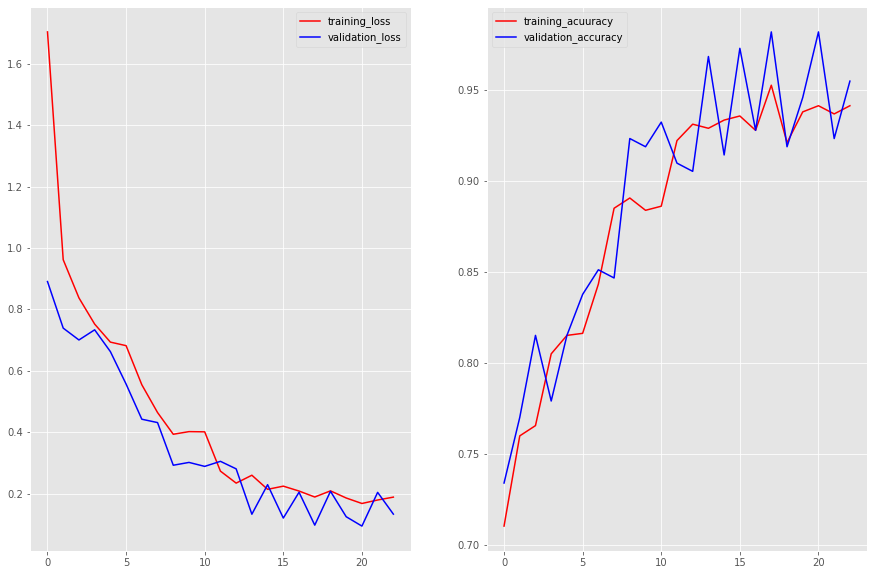

In [ ]:
epochs = np.arange(len(history1.history['loss']))
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].plot(epochs, history1.history['loss'], color='r', label='training_loss')
axes[0].plot(epochs, history1.history['val_loss'], color='b', label='validation_loss')
axes[0].legend()

axes[1].plot(epochs, history1.history['accuracy'], color='r', label='training_acuuracy')
axes[1].plot(epochs, history1.history['val_accuracy'], color='b', label='validation_accuracy')
axes[1].legend()

plt.show()

In [ ]:
from matplotlib import style
style.use('ggplot')

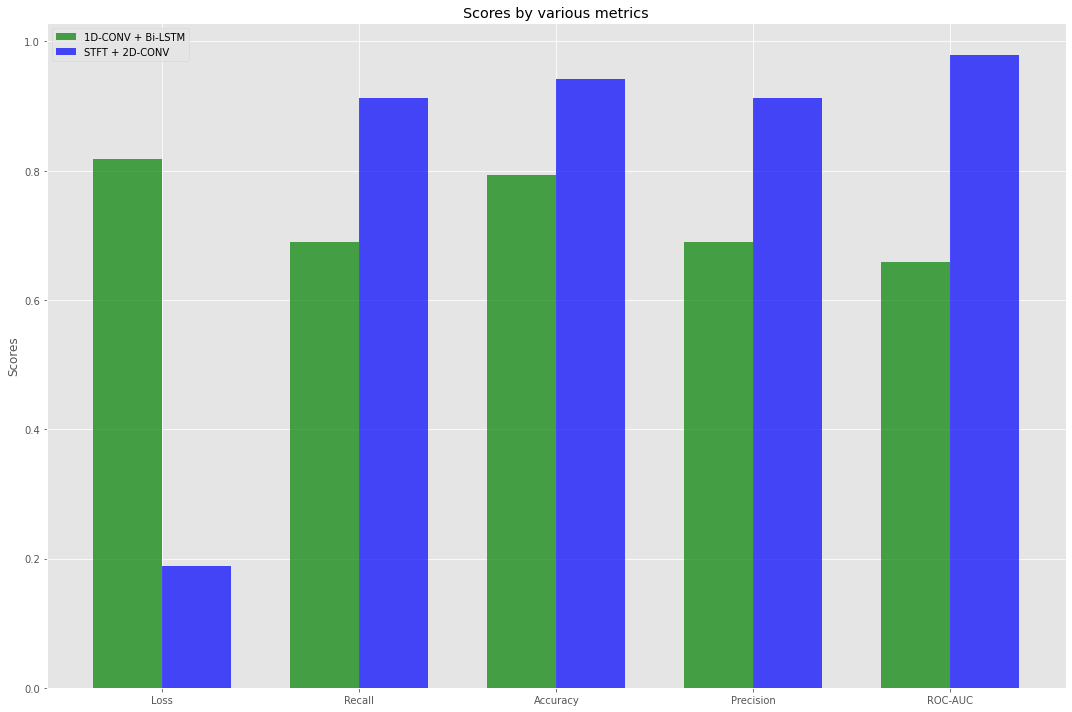

In [ ]:
labels = ['', 'Loss', 'Recall', 'Accuracy', 'Precision', 'ROC-AUC']
lstm = [history.history['loss'][-1], history.history['recall'][-1], history.history['accuracy'][-1], history.history['precision'][-1], history.history['prc'][-1]]
stft = [history1.history['loss'][-1], history1.history['recall'][-1], history1.history['accuracy'][-1], history1.history['precision'][-1], history1.history['prc'][-1]]

x = np.arange(len(labels) - 1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, lstm, width, label='1D-CONV + Bi-LSTM', color='g', alpha=0.7)#, tick_label=labels)
rects2 = ax.bar(x + width/2, stft, width, label='STFT + 2D-CONV', color='b', alpha=0.7)#, tick_label=labels)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by various metrics')
# ax.set_xticks(x, labels)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [ ]:
model.save('PCG.h5')

In [ ]:
a = None

In [ ]:
for i in train_ds.take(1):
  a = (i[0].numpy()[0]).reshape(28, 28)
  break

ValueError: ignored

In [ ]:
visualize_interm_convs(a, model1)

ValueError: ignored

In [ ]:
import cv2
a = cv2.resize(a, (28, 28))

In [ ]:
model

NameError: ignored

# 5. Plotting models


In [ ]:
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/ECG_Classifier.h5')

OSError: ignored

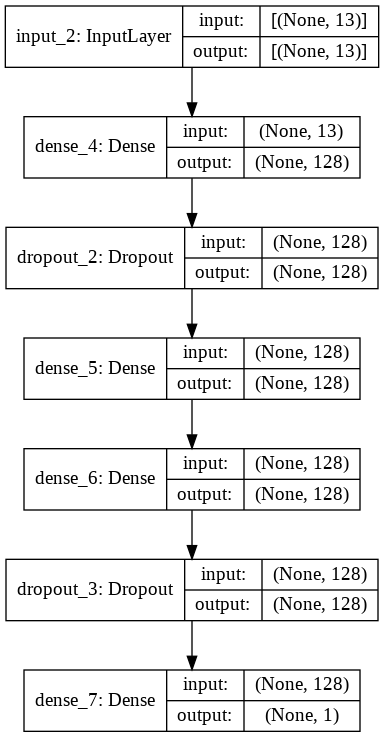

In [ ]:
plot_model(model,show_shapes=True,to_file='/content/ECG_Classifier1.h5.png')

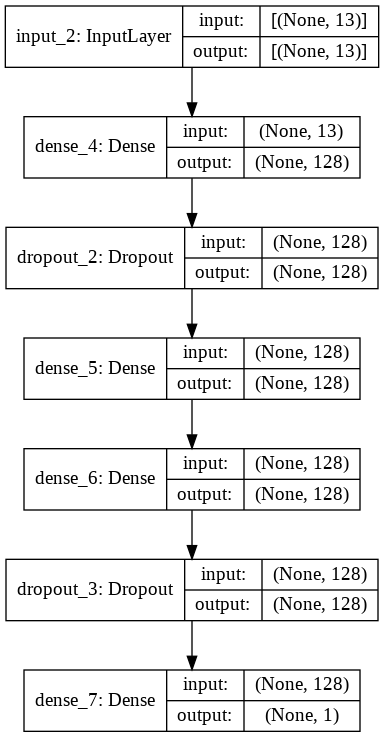

In [ ]:

plot_model(model, show_shapes=True, show_layer_names=True, to_file='base-model.png',)

# 6. Ensemble

In [ ]:
V_model = tf.keras.models.load_model('/content/csv_model_heart_failure_prediction (1) (1).h5')

In [ ]:
data = pd.read_csv('/content/heart (1).csv')

In [ ]:
for i in range(len(data['chol'])):
    if data['chol'][i] < 200:
               data['chol'][i] = 0
    elif 200 <= data['chol'][i] <= 239:
               data['chol'][i] = 1
    else:
               data['chol'][i] = 2

data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['trestbps'] = (data['trestbps'] - data['trestbps'].mean()) / data['trestbps'].std()
data['thalach'] = (data['thalach'] - data['thalach'].mean()) / data['thalach'].std()
data['oldpeak'] = (data['oldpeak'] - data['oldpeak'].mean()) / data['oldpeak'].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
V_X = np.array(data.drop(['target'], axis=1))
V_y = np.array(data['target'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,1,3,0.762694,1,1,0,0.015417,0,1.085542,0,0,1,1
1,-1.912150,1,2,-0.092585,2,0,1,1.630774,0,2.119067,0,0,2,1
2,-1.471723,0,1,-0.092585,1,0,0,0.975900,0,0.310399,2,0,2,1
3,0.179877,1,1,-0.662770,1,0,1,1.237849,0,-0.206364,2,0,2,1
4,0.289984,0,0,-0.662770,2,0,1,0.582975,1,-0.378618,2,0,2,1


In [ ]:
def label_binarizer(labels, keep_key=0):
    labels = np.array(labels)
    labels = labels == keep_key
    labels = labels.astype('int32')
    return labels

In [ ]:
PCG_y1 = label_binarizer(PCG_y)

In [ ]:
def map_func1(waveform):
    spectro = get_spectrogram(tf.reshape(waveform, (-1, 4000)))
    return spectro

In [ ]:
PCG_X1 = map_func1(PCG_X)

(370, 30, 129) SDS


In [ ]:
class EnsembleModel:
  def __init__(self, models, data_for_models, names):
    self.models = models
    self.inputattr = data_for_models
    self.names = names
    self.log = {}
    self.outputs = None
    self.probs = None
  
  def classification_ensemble(self):
    probs = []
    for i in range(len(self.models)):
      li = np.array([self.inputattr[j][i].numpy() for j in range(len(self.inputattr))])
      predictions = self.models[i].predict(li)
      print(predictions, 'w')
      if predictions.shape[1] == 3:
        mean_preds = np.mean(predictions[:, 1:], axis=1)
        predictions = np.concatenate([np.expand_dims(predictions[:, 0], -1), np.expand_dims(mean_preds, -1)], axis=1)
        print(predictions.shape)
      probs.append(predictions)
      print(predictions.shape)

    probs = np.array(probs)
    self.probs = probs

  def score_level_fusion(self, weightage):
    outputs = []
    for i in range(self.probs.shape[0]):
      outputs.append(self.probs[i] * weightage[i])
    
    self.outputs = np.argmax(np.sum(outputs, axis=0), axis=1)
  

  @classmethod
  def sync_data(cls, data_for_models, labels_for_models, n_samples):
    label_log = {}
    for i in range(len(labels_for_models)):
      class_0 = np.argwhere(labels_for_models[i] == 0)[:n_samples]
      class_1 = np.argwhere(labels_for_models[i] == 1)[:n_samples]

      label_log[i] = np.append(class_0, class_1)
    
    patients_data = {}
    for i in range(2 * n_samples):
      patients_data[i] = [label_log[j][i] for j in range(len(labels_for_models))]
    
    data_vals_patients = []
    for key, value in patients_data.items():
      temp_data = []
      ind = 0
      for i in data_for_models:
        if not isinstance(i[ind], tf.Tensor):
          vartensor = tf.Variable(i[ind], dtype='float32')
          temp_data.append(vartensor)
        else:
          temp_data.append(i[ind])
        ind += 1
      data_vals_patients.append(temp_data)


    return data_vals_patients

  @staticmethod
  def label_binarizer(labels, keep_key=0):
    labels = labels == keep_key
    labels = labels.astype('bool')
    return labels
  
  @staticmethod
  def map_func1(waveform):
    spectro = get_spectrogram(tf.reshape(waveform, (-1, 4000)))
    return spectro
      

In [ ]:
data_for_models = EnsembleModel.sync_data([V_X, ECG_X, PCG_X1], [V_y, ECG_y, PCG_y1], 10)

In [ ]:
model_final = EnsembleModel([V_model, ECG_model, PCG_model], data_for_models, 'we')

In [ ]:
model_final.classification_ensemble()

[[0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]
 [0.7437544]] w
(20, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] w
(20, 1)
[[0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.01013045 0.00477608]
 [0.9850935  0.0101304

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: ignored